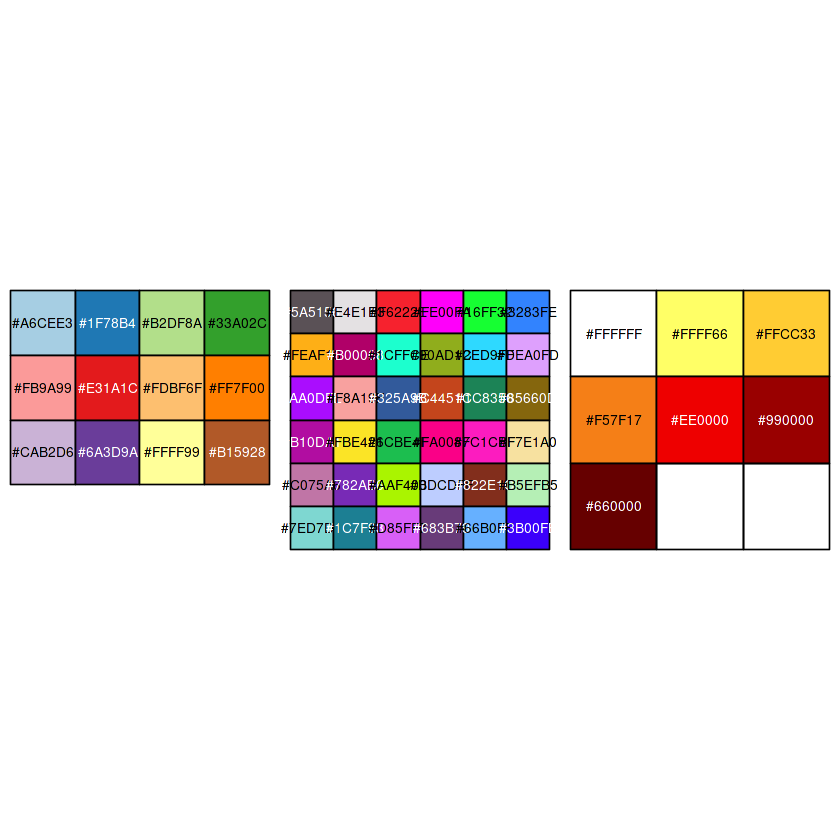

In [15]:
library(ggplot2)
library(dplyr)
library(paletteer)
library(ggpubr)

library(RColorBrewer)
library(scales)
library(pals)

library(igraph)
library(dplyr)

par(mfrow=c(1,3))
# method color
my_col_m <- brewer.pal(12, "Paired")
show_col(my_col_m)
# cell type color
my_col_c <- unlist(polychrome())
show_col(my_col_c)

my_color <- c("#FFFFFF","#FFFF66","#FFCC33","#F57F17","#EE0000","#990000","#660000")
show_col(my_color)

In [32]:
community_strength <- function(graph, label, label_idx){
    require(igraph)
    V(graph)$label <- label
    label_ls <- unique(label)
    df_graph <- as_data_frame(graph, what = c("edges"))
    
    v_1 <- V(graph)[V(graph)$label == label_ls[label_idx]]
    v_2 <- V(graph)[V(graph)$label != label_ls[label_idx]]

    
    l1 <- length(v_1)
    
    j1 <- 0
    w1 <- 0
    for (i in v_1){
        df_tmp <- df_graph[df_graph$to == i | df_graph$from == i,] # edges of node i
        a <- sum(df_tmp$from %in% v_1 & df_tmp$to %in% v_1) # within cluster edges of node i
        b <- sum(df_tmp$from %in% v_1 & df_tmp$to %in% v_2) # between cluster edges of node i
        c <- sum(df_tmp$weight[df_tmp$from %in% v_1 & df_tmp$to %in% v_1])
        d <- sum(df_tmp$weight[df_tmp$from %in% v_1 & df_tmp$to %in% v_2])
        if(b>=a){j1 <- j1+1}
        if(d>=c){w1 <- w1+1}
    }
    return(list(j1=j1, j1_frac=j1/l1, w1=w1, w1_frac=w1/l1))
}

In [17]:
dataset_ls <- c("Buenrostro_2018", "candidate1", "Cell_line_mixing", "Chen_2019",  "PBMC_multiomics", "candidate2") #"Ma_2019",
k_ls <- c(9, 13, 10, 13, 15, 10)

In [18]:
j <- 2
n <- 15

dataset <- dataset_ls[j]
k_optimal <- k_ls[j]

setwd(paste0("/home/siluo/public/SiyuanLuo/projects/benchmark/outputs/", dataset))
df <- read.table(file="meta_info_for_evaluation.tsv", sep="\t", header=TRUE)
df_metrics <- read.table(file="metrics_value.tsv", sep="\t", header=TRUE)
df_metrics_selected <- df_metrics[as.logical(df_metrics$metric %in% c("ARI")),]
df_metrics_selected <- df_metrics_selected %>% filter(ndim == n) %>% filter(resolution == 0.05)

In [19]:
df_metrics_selected

,n_clusters,metric,value,method,long_method,feature_type,tile_size,distance,ndim,resolution,rds_file,clustering_file,snn_file
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,10,ARI,0.9525231,Signac,Signac_all_cell_peaks,all_cell_peaks,0,default,15,0.05,candidate1/evaluation/Signac/all_cell_peaks/0/default/15/r0.05_evaluation.RDS,candidate1/clustering/Signac/all_cell_peaks/0/default/15/r0.05.tsv,candidate1/clustering/Signac/all_cell_peaks/0/default/15/sobj_SNN.RDS
781,10,ARI,0.9524732,Signac,Signac_by_cluster_peaks,by_cluster_peaks,0,default,15,0.05,candidate1/evaluation/Signac/by_cluster_peaks/0/default/15/r0.05_evaluation.RDS,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/r0.05.tsv,candidate1/clustering/Signac/by_cluster_peaks/0/default/15/sobj_SNN.RDS
1561,10,ARI,0.9397695,ArchR,ArchR_peaks,peaks,500,default,15,0.05,candidate1/evaluation/ArchR/peaks/500/default/15/r0.05_evaluation.RDS,candidate1/clustering/ArchR/peaks/500/default/15/r0.05.tsv,candidate1/clustering/ArchR/peaks/500/default/15/sobj_SNN.RDS
2341,10,ARI,0.9386315,ArchR,ArchR_tiles,tiles,500,default,15,0.05,candidate1/evaluation/ArchR/tiles/500/default/15/r0.05_evaluation.RDS,candidate1/clustering/ArchR/tiles/500/default/15/r0.05.tsv,candidate1/clustering/ArchR/tiles/500/default/15/sobj_SNN.RDS
3121,11,ARI,0.9646416,SnapATAC1,SnapATAC1,default,5000,default,15,0.05,candidate1/evaluation/SnapATAC1/default/5000/default/15/r0.05_evaluation.RDS,candidate1/clustering/SnapATAC1/default/5000/default/15/r0.05.tsv,candidate1/clustering/SnapATAC1/default/5000/default/15/sobj_SNN.RDS
3901,11,ARI,0.9576162,aggregation,aggregation,default,0,default,15,0.05,candidate1/evaluation/aggregation/default/0/default/15/r0.05_evaluation.RDS,candidate1/clustering/aggregation/default/0/default/15/r0.05.tsv,candidate1/clustering/aggregation/default/0/default/15/sobj_SNN.RDS
4681,12,ARI,0.9687631,SnapATAC2,SnapATAC2_jaccard,default,500,jaccard,15,0.05,candidate1/evaluation/SnapATAC2/default/500/jaccard/15/r0.05_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/jaccard/15/r0.05.tsv,candidate1/clustering/SnapATAC2/default/500/jaccard/15/sobj_SNN.RDS
5461,12,ARI,0.9687820,SnapATAC2,SnapATAC2_cosine,default,500,cosine,15,0.05,candidate1/evaluation/SnapATAC2/default/500/cosine/15/r0.05_evaluation.RDS,candidate1/clustering/SnapATAC2/default/500/cosine/15/r0.05.tsv,candidate1/clustering/SnapATAC2/default/500/cosine/15/sobj_SNN.RDS


In [35]:
graph_name <- paste0("snn_ndim", n)
df <- data.frame(method=c(), cell_type=c(), weak_cells=c(), weak_frac=c())

for(i in 1:dim(df_metrics_selected[1])){
    sobj_file <- df_metrics_selected$snn_file[i]
    lm <- df_metrics_selected$long_method[i]
    sobj <- readRDS(sobj_file)
    g <- sobj@graphs[[graph_name]]
    attributes(g)$class <- "dgCMatrix"
    graph <- graph_from_adjacency_matrix(adjmatrix = g, mode = "undirected", weighted = TRUE, add.colnames = TRUE)
    label <- sobj$ground_truth
    label_ls <- unique(label)
    for(c in 1:length(label_ls)){
        res <- community_strength(graph, label, label_idx=c)
        df <- rbind(df, list(method=lm, cell_type=label_ls[c], weak_cells=res$j1, weak_frac=res$j1_frac))
    }
}



Warning message in 1:dim(df_metrics_selected[1]):
“numerical expression has 2 elements: only the first used”


In [34]:
df

method,cell_type,weak_cells,weak_frac
<chr>,<chr>,<dbl>,<dbl>
Signac_all_cell_peaks,Pancreatic_Acinar_Cell,2,0.0006671114
Signac_all_cell_peaks,Esophageal_Epithelial_Cell,10,0.0039062500
Signac_all_cell_peaks,Small_Intestinal_Enterocyte,10,0.0077881620
Signac_all_cell_peaks,Vascular_Smooth_Muscle_1,19,0.0081092616
Signac_all_cell_peaks,Thyroid_Follicular_Cell,1,0.0003746722
Signac_all_cell_peaks,Luteal_Cell_Ovarian,0,0.0000000000
Signac_all_cell_peaks,Hepatocyte,1,0.0005841121
Signac_all_cell_peaks,Colonic_Goblet_Cell,22,0.0594594595
Signac_all_cell_peaks,Parietal_Cell,3,0.0048309179


In [45]:
my_color <- c("#FFFFFF","#0066FF","#0033FF")

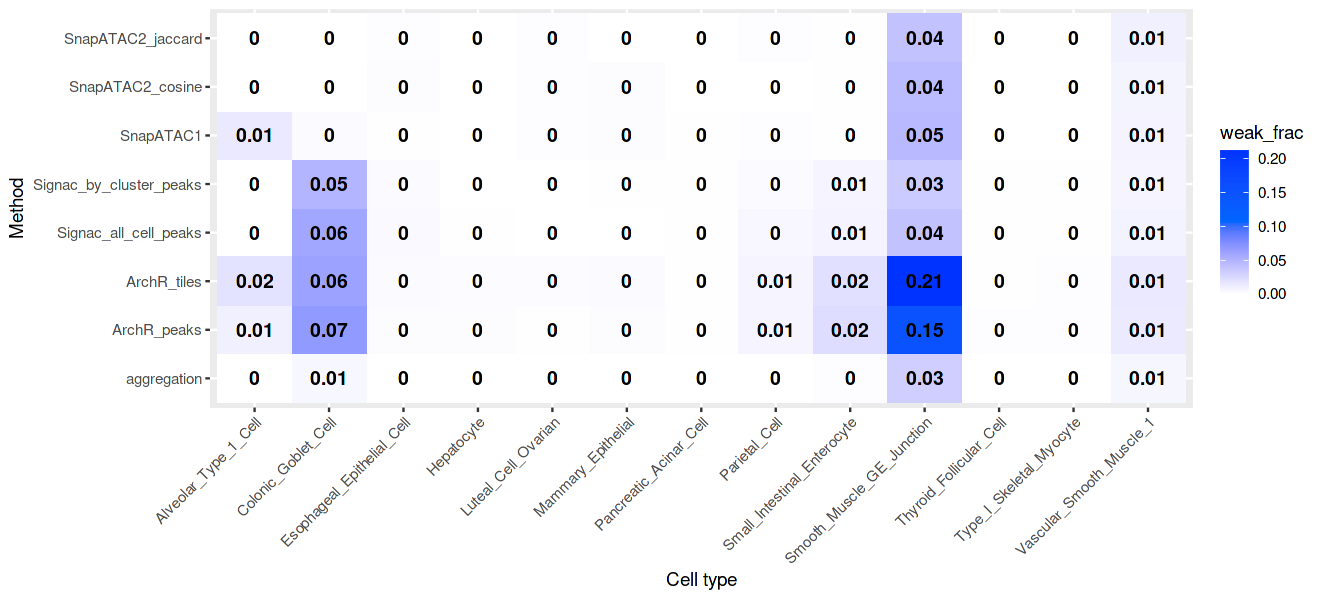

In [46]:
options(repr.plot.width=11, repr.plot.height=5)

ggplot(df, aes(cell_type, method,  fill = weak_frac, label = round(weak_frac, 2))) + 
  geom_tile() +
  # scale_fill_gradient(low = "white", high = "blue", name = "Fraction of bridge nodes") + # limits = c(1, 1.6)
  labs(y = "Method", x = "Cell type") +
  geom_text(color = "black", size = 4, fontface = "bold")  +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  scale_fill_gradientn(colours = my_color, guide = guide_colourbar())